**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content** There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender
    - 1=male,
    - 2=female
- EDUCATION:
    - 1=graduate school,
    - 2=university,
    - 3=high school,
    - 0, 4, 5, 6=others)
- MARRIAGE: Marital status
    - 1=married,
    - 2=single,
    - 3=divorce,
    - 0=others
- AGE: Age in years
- PAY_0: Repayment status in September, 2005
    - -2: No consumption;
    - -1: Paid in full;
    - 0: The use of revolving credit;
    - 1 = payment delay for one month;
    - 2 = payment delay for two months; . . .;
    - 8 = payment delay for eight months;
    - 9 = payment delay for nine months and above.
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment
    - 1=yes,
    - 0=no

In [30]:
create a class or function in transformation.py in that class i have encode the the education columns



SyntaxError: invalid syntax (Temp/ipykernel_25140/1134695917.py, line 1)

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv('card.csv')

In [33]:
df1 = df.copy()

# 2 Data Analysis

In [5]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
print(f'Dataset have {df1.shape[0]} rows and {df1.shape[1]} columns')

Dataset have 30000 rows and 25 columns


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

OBSERVATIONS:

- 30000 rows and 25 columns
- 24 independent variables with 'default' as the dependent variable
- 13 float and 12 int type variables
- All variables with datatype int64, except AGE seem to be categorical variables.
- All variables with datatype float64 seem to be numeric variables

As we can see PAY_0 should be PAY_1 and name should be changed from default.payment.next.month to something simple like default

In [11]:
df1.rename(columns={'default.payment.next.month': 'default', 'PAY_0':'PAY_1'}, inplace=True)

#### Checking missing values

In [13]:
df1.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

**OBSERVATION** : No missing values

In [14]:
df1['SEX'] = df1['SEX'].replace({1:'Male', 2:'Female'})
df1['EDUCATION'] = df1['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df1['MARRIAGE'] = df1['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


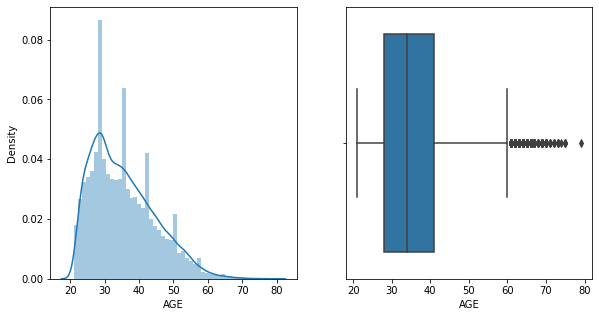

In [21]:
plt.figure(figsize = (15,5))
plt.title('Distribution of customer Age')

plt.subplot(1,3,1)
sns.distplot(df1['AGE'])

plt.subplot(1,3,2)
sns.boxplot(df1['AGE'])

plt.show()

##### Skewness and kurtosis

In [22]:
df1['AGE'].skew(), df1['AGE'].kurt()

(0.7322458687830562, 0.04430337823580954)

Skewness and Kurtosis are used to describe the spread and height of your normal distribution.

**OBSERVATIONS:**

- The data spread for AGE is 21 to 79
- Most of the customers fall under 25 to 35 age
- A few outliers after the age of 60
- The histogram shows few peaks around the ages 30, 35, 40 and 50 which indicates more customers for these ages
- The AGE data is slightly right skewed (0.73)


#### 1. Bivariate/Mutivariate Analysis : AGE against GENDER along with default

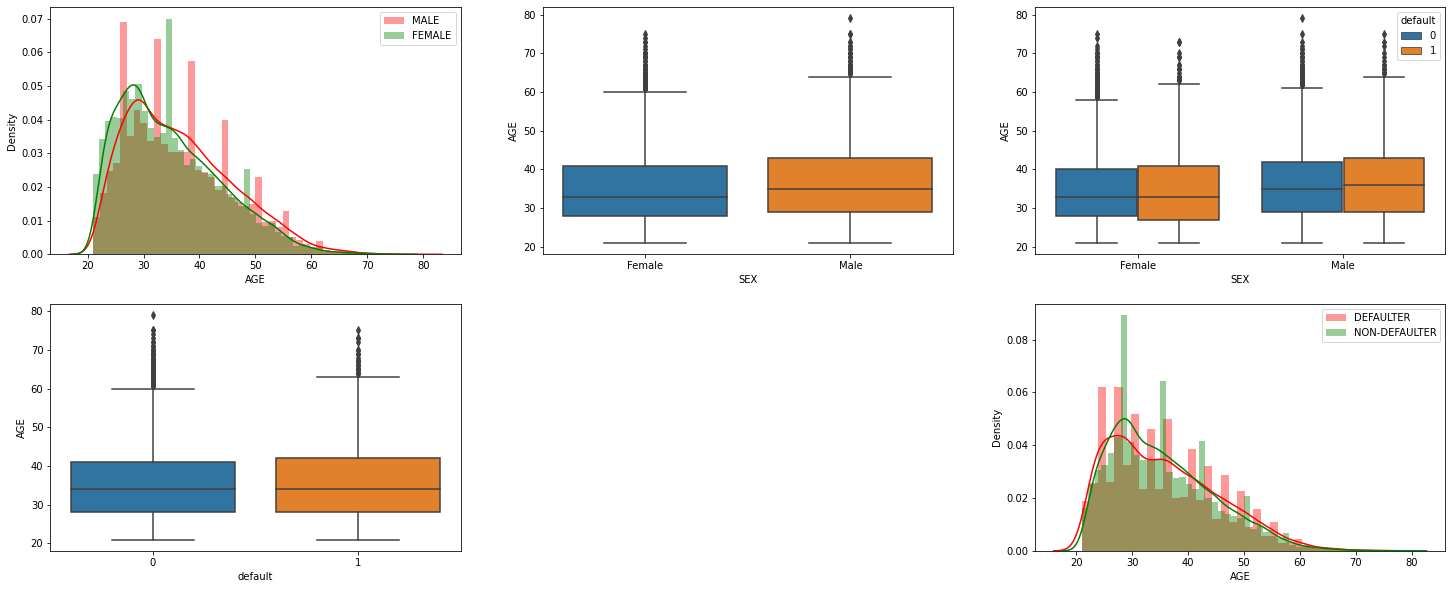

In [31]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.distplot(df1[df1['SEX']=='Male']['AGE'], color='r', label='MALE')
sns.distplot(df1[df1['SEX']=='Female']['AGE'], color='g', label='FEMALE')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(df1['SEX'], df1['AGE'])

plt.subplot(2,3,3)
sns.boxplot(df1['SEX'], df1['AGE'], hue=df1['default'])

plt.subplot(2,3,4)
sns.boxplot(df1['default'], df1['AGE'])

plt.subplot(2,3,6)
sns.distplot(df1[df1['default']==1]['AGE'], color='r', label='DEFAULTER')
sns.distplot(df1[df1['default']==0]['AGE'], color='g', label='NON-DEFAULTER')
plt.legend()
plt.show()

#### Descriptive stats

In [38]:
df1.groupby(['default','SEX'])['AGE'].describe()

count       mean       std   min   25%   50%   75%   max
default SEX                                                               
0       Female  14349.0  34.781866  8.868165  21.0  28.0  33.0  40.0  75.0
        Male     9015.0  36.428619  9.312213  21.0  29.0  35.0  42.0  79.0
1       Female   3763.0  34.902206  9.620276  21.0  27.0  33.0  41.0  73.0
        Male     2873.0  36.804386  9.684725  21.0  29.0  36.0  43.0  75.0

As we can see female customers are more as compare to male in default list

In [39]:
df1.groupby(['EDUCATION', 'default'])['AGE'].describe()

count       mean        std   min   25%   50%   75%  \
EDUCATION   default                                                          
Graduation  0         8549.0  34.137443   8.138896  21.0  28.0  32.0  39.0   
            1         2036.0  34.628193   8.791540  21.0  28.0  33.0  40.0   
High_School 0         3680.0  40.327446  10.379591  21.0  32.0  40.0  48.0   
            1         1237.0  40.218270  10.624477  21.0  31.0  41.0  48.0   
Others      0          435.0  35.983908   9.268012  21.0  28.0  35.0  42.0   
            1           33.0  38.242424   9.804432  22.0  29.0  40.0  45.0   
University  0        10700.0  34.728037   8.739891  21.0  28.0  34.0  40.0   
            1         3330.0  34.703003   9.372779  21.0  27.0  33.0  41.0   

                      max  
EDUCATION   default        
Graduation  0        79.0  
            1        75.0  
High_School 0        74.0  
            1        73.0  
Others      0        66.0  
            1        55.0  
University  0        75.0  
            1        73.0

On the basis of education university educations have more default

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

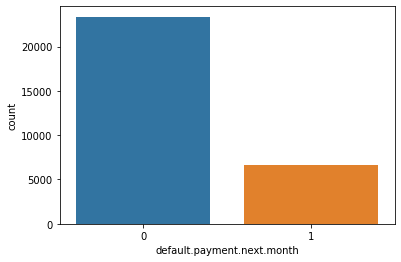

In [43]:
sns.countplot(df['default.payment.next.month'])

In [29]:
df1['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:xlabel='BILL_AMT2'>

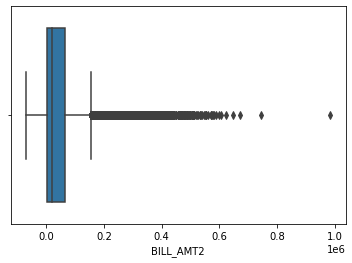

In [9]:
sns.boxplot(df1['BILL_AMT2'])

In [13]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [19]:
df1['EDUCATION'].unique()
array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [14]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# 1. Import libraries and Dataset

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# 2. Visualization

Text(0.5, 1.0, 'Correlation matrix')

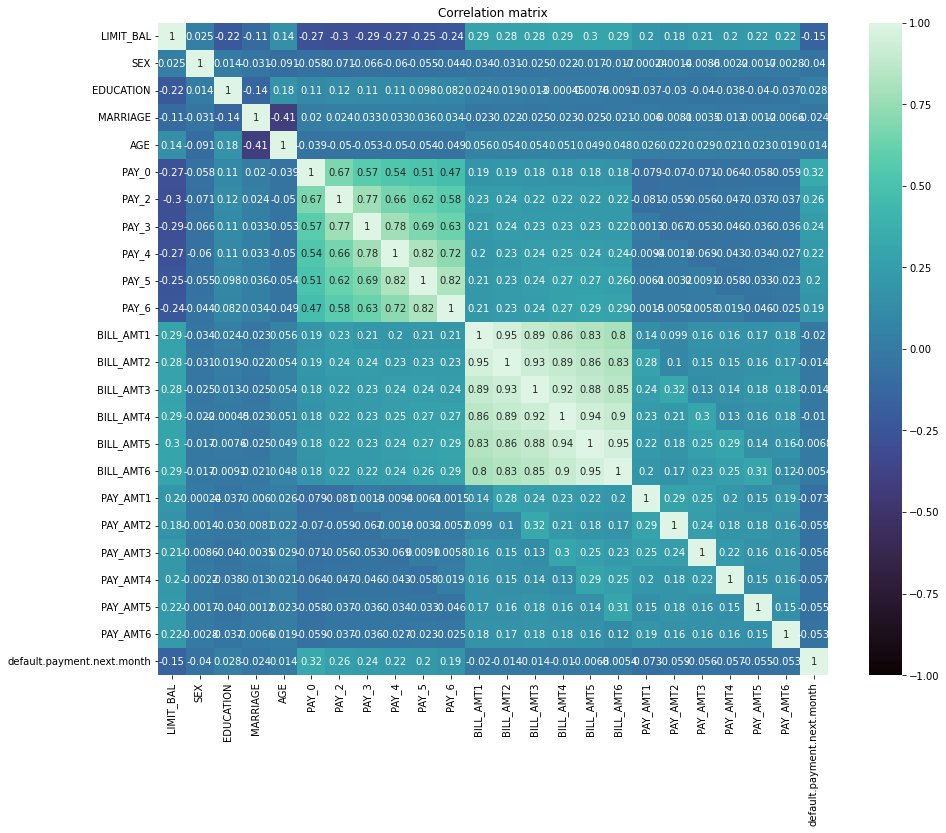

In [40]:
corr = df1.drop('ID', axis=1).corr()
plt.figure(figsize=(15,12))

sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation matrix')

# 3. Preprocessing

In [41]:
def one_hot_encoding(df, column_dict):
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column],prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [42]:
def preprocess_inputs(df):

    # Transformation
    # Dropping ID column
    df = df.drop('ID', axis=1)
    
    '''
    Model will consider Education and Marriage as a ordinal features
    so encoding them 
    '''
    df = one_hot_encoding(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    # Splitting data 
    y = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis=1).copy()
    
    # Scalar
    '''
    Standardization the whole colums in such a 
    way that each column have mean is zero and variance is one
    '''
    scalar = StandardScaler()
    X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns) # It will be a numpy array and columns names are same are previous
    
    return X, y

In [43]:
X, y = preprocess_inputs(df1)
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


# 4. Model Training

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.3, random_state=123)

In [45]:
models = {
    LogisticRegression():  "Logistic Regression",
    SVC():               "Suport Vector Machine",
    MLPClassifier():            "Neural Network",
    RandomForestClassifier():    "Random Forest"
}

for model in models.keys():
    model.fit(X_train,y_train)

In [46]:
for model, name in models.items():
    print(name + "::{:.2f}%".format(model.score(X_test,y_test)*100))

Logistic Regression::81.35%
Suport Vector Machine::81.91%
Neural Network::80.64%
Random Forest::81.40%


In [49]:
for model, name in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - F1 Score: {f1:.2f}")

Logistic Regression - F1 Score: 0.39
Suport Vector Machine - F1 Score: 0.45
Neural Network - F1 Score: 0.44
Random Forest - F1 Score: 0.47


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=123)

models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'MLPClassifier': MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Define the hyperparameter grid for each model
param_grid = {
    'LogisticRegression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10]
    }
}

for model_name, model in models.items():
    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='f1')
    grid_search.fit(X_train, y_train)

    # Get the best model and its corresponding score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # Print the model name and its F1 score
    print(model_name + " - F1 Score: {:.2f}".format(f1))

    # Print the best hyperparameters
    print("Best Hyperparameters:")
    print(grid_search.best_params_)


LogisticRegression - F1 Score: 0.39
Best Hyperparameters:
{'C': 0.1, 'solver': 'liblinear'}
